In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import joblib


In [2]:
df = pd.read_csv("datasets/tsla_data.csv")

In [3]:
df["date"] = pd.to_datetime(df["date"])

In [4]:
df = df[["date","close"]]

In [5]:
df.sort_values(by="date", inplace=True)

In [6]:
df.set_index("date", inplace=True)

In [7]:
p, d, q = 1, 1, 1  
P, D, Q, s = 1, 1, 1, 12

In [8]:
model = SARIMAX(df['close'],
                order=(p, d, q),
                seasonal_order=(P, D, Q, s),
                enforce_stationarity=False,
                enforce_invertibility=False)


c:\Users\MEHMET\Desktop\TSLA_stcok_prediction\stenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\MEHMET\Desktop\TSLA_stcok_prediction\stenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [9]:
model_fitted = model.fit(disp=False)
print(model_fitted.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              close   No. Observations:                 1257
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -4345.219
Date:                            Fri, 23 Aug 2024   AIC                           8700.437
Time:                                    20:43:46   BIC                           8726.011
Sample:                                         0   HQIC                          8710.059
                                           - 1257                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5767      0.466     -1.237      0.216      -1.490       0.337
ma.L1          0.5484      0.479   

In [10]:
forecast = model_fitted.get_forecast(steps=12)
forecast_df = forecast.conf_int()
forecast_df['forecast'] = model_fitted.predict(start=forecast_df.index[0], end=forecast_df.index[-1])



c:\Users\MEHMET\Desktop\TSLA_stcok_prediction\stenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\MEHMET\Desktop\TSLA_stcok_prediction\stenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\MEHMET\Desktop\TSLA_stcok_prediction\stenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [11]:
last_date = df.index[-1]


In [12]:
forecast_df["date"] = pd.date_range(start=last_date, periods=12 + 1, freq='D')[1:]

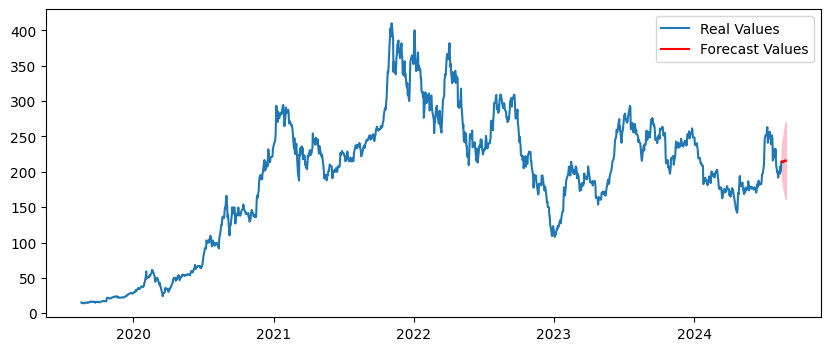

In [13]:
plt.figure(figsize=(10, 4))
plt.plot(df.index, df['close'], label='Real Values')
plt.plot(forecast_df.date, forecast_df['forecast'], label='Forecast Values', color='red')
plt.fill_between(forecast_df.date, 
                 forecast_df['lower close'], 
                 forecast_df['upper close'], color='pink')
plt.legend()
plt.show()

In [14]:
joblib.dump(model_fitted, "sarima_model.pkl")

['sarima_model.pkl']